In [1]:
import pandas as pd
path = "https://github.com/alexesc/data/raw/main/task1feb2022/temp/31d_BYOON.xlsx"
sheet_name = "Sheet1"
S31D = pd.read_excel(path, sheet_name, engine='openpyxl')
df = S31D

In [38]:
# Convert the time column to a datetime data type
df['time'] = pd.to_datetime(df['Date'])

# Set the time column as the index of the DataFrame
#df.set_index('time', inplace=True)

df

,Site_Code,Date,Wtemp_degree_C,time,newY,Y1,Y2
0,31d,2011-06-01,12.01,2011-06-01,12.010000,9.132691,15.175309
1,31d,2011-06-02,11.96,2011-06-02,11.978212,9.111691,15.154309
2,31d,2011-06-03,11.84,2011-06-03,11.876055,9.066691,15.109309
3,31d,2011-06-04,12.35,2011-06-04,12.406401,9.106691,15.149309
4,31d,2011-06-05,12.41,2011-06-05,12.485546,9.052691,15.095309
...,...,...,...,...,...,...,...
4122,31d,2022-11-11,6.80,2022-11-11,6.758605,NaN,NaN
4123,31d,2022-11-12,6.28,2022-11-12,6.251320,NaN,NaN
4124,31d,2022-11-13,6.30,2022-11-13,6.280815,NaN,NaN
4125,31d,2022-11-14,5.80,2022-11-14,5.791168,NaN,NaN


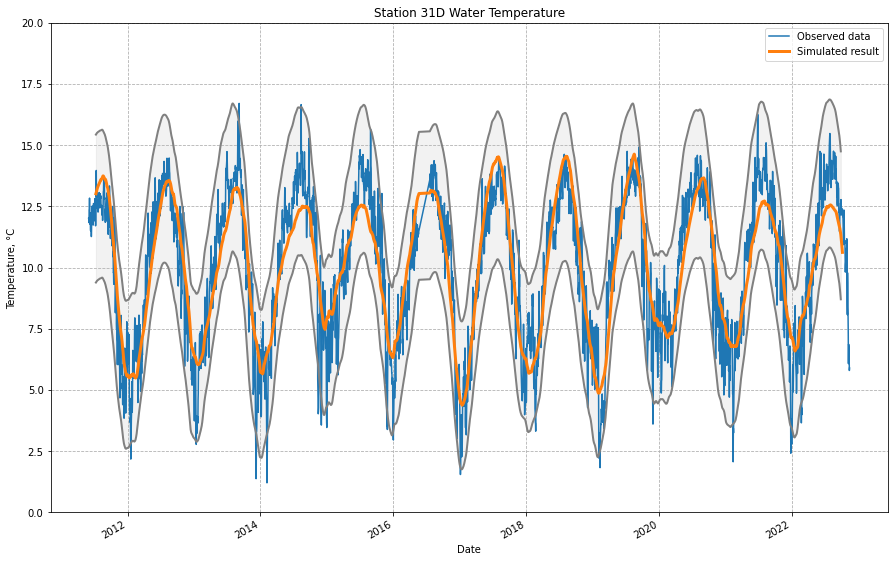

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import pandas as pd

import numpy as np
import pandas as pd


def generate_fake_bollinger_bands(df, X, Y, window, deviation):
    #This function generates fake data for Y1 and Y2 by first calculating the SMA of the original Y data using the np.convolve function with a moving average window of size window. 
    #Then, the standard deviation is calculated using the np.sqrt function and np.convolve. Finally, Y1 is calculated as the SMA minus deviation times the standard deviation,
    # and Y2 is calculated as the SMA plus deviation times the standard deviation.
    # Note that deviation is a parameter that you can set to control the distance between the SMA and the upper and lower Bollinger Bands. The higher the value of deviation, the further apart the bands will be from the SMA.
    # Typically, deviation is set to 2 or 2.5 to represent two or 2.5 standard deviations from the SMA.
    # The logical values for the window parameter depend on the length of your data and the desired smoothness of the SMA line. A commonly used window size is 20, but this may vary depending on the length of your data and the desired level of smoothing. A larger window size will result in a smoother SMA line, while a smaller window size will result in a more sensitive SMA line that reacts more quickly to changes in the data.
    # For example, if you have daily data for a year (252 days), a window size of 20 would result in an SMA line that represents a 20-day moving average. If you have weekly data for 5 years (260 weeks), a window size of 20 would result in an SMA line that represents a 20-week moving average.
    
    t = np.array(df[X])
    y = np.array(df[Y])
    
    sma = np.convolve(y, np.ones(window)/window, mode='valid')
    std_dev = np.std(y[:len(sma)])
    
    Y1 = sma - deviation * std_dev
    Y2 = sma + deviation * std_dev
    
    return pd.DataFrame({X: t[:len(sma)], 'Y1': Y1, 'Y2': Y2})


def generate_fake_data(df, X, Y, range_percent=40):
    t = np.array(df[X])
    y = np.array(df[Y])
    #y_noise = np.random.uniform(-range_percent/100, range_percent/100, size=len(y))
    y_noise = np.sin(np.linspace(0, 20 * np.pi, len(t))) * range_percent/100
    #The argument np.linspace(0, 10 * np.pi, len(X)) generates an array of values that ranges from 0 to 10 * np.pi with len(X) number of elements. The 10 in 10 * np.pi controls the number of cycles that the oscillation goes through in the given range, so increasing this value will make the oscillation faster, and decreasing it will make it slower.
    #y_noise = np.cos(np.linspace(0, 30 * np.pi, len(t))) * range_percent/100

    y_fake = y + y * y_noise
    return pd.DataFrame({X: t, 'newY': y_fake})

df_fake_bollinger = generate_fake_bollinger_bands(df, X='time', Y='Wtemp_degree_C', window = 10, deviation=1)

df_fake = generate_fake_data(df, X='time', Y='Wtemp_degree_C', range_percent=10)

df['newY'] = df_fake['newY']
df['Y1'] = df_fake_bollinger['Y1']
df['Y2'] = df_fake_bollinger['Y2']

df.plot(x='time', y='Wtemp_degree_C', kind='line', figsize=(15,10), label='Observed data')

df_restricted = df[(df['time'] >= '2011-01-01') & (df['time'] <= '2023-01-01')]

# you can increase the size of the plot by specifying the figsize parameter when creating the plot. For example: The figsize parameter takes
# a tuple of the width and height of the plot in inches. In this example, the plot will have a width of 10 inches and a height of 6 inches. 
#You can adjust these values to change the size of the plot as desired.
##
#df_restricted.plot(x='time', y='Wtemp_degree_C', kind='line', figsize=(15,10), label='Observed data')

#df_restricted.plot(x='time', y='newY', kind='line', figsize=(15,10), label='NewY', ax=plt.gca())
# In this example, the first call to .plot() creates a plot of the 'Discharge_cfs' column, and the second call to .plot() creates a plot of the 'NewY' column
# using the same x-axis ('time'). The ax parameter is used to specify that the second plot should be created on the same axis as the first plot. 
# The label parameter is used to specify a label for each line, which will be displayed in the legend. The plt.legend() function creates the legend,
# and plt.show() displays the plot.

#  you can use the rolling method from pandas to smooth the 'newY' curve. This method applies a rolling mean (average) to the data, which can be used to smooth the curve. 
#You can specify the window size (i.e., the number of data points to include in the mean) and whether to use a mean or a sum. Here's an example using a window size of 10:

window_size = 80
df_restricted['smoothed_newY'] = df_restricted['newY'].rolling(window=window_size, center=True).mean()
df_restricted.plot(x='time', y='smoothed_newY', kind='line', figsize=(15,10), label='Simulated result', linewidth=3 , ax=plt.gca())

df_restricted['smoothed_Y1'] = df_restricted['Y1'].rolling(window=window_size, center=True).mean()
df_restricted['smoothed_Y2'] = df_restricted['Y2'].rolling(window=window_size, center=True).mean()

df_restricted.plot(x='time', y='smoothed_Y1', kind='line', figsize=(15,10), linewidth=2, color='grey', ax=plt.gca(), legend=False )
df_restricted.plot(x='time', y='smoothed_Y2', kind='line', figsize=(15,10), linewidth=2, color='grey', ax=plt.gca(), legend=False)
plt.fill_between(df_restricted['time'], df_restricted['smoothed_Y1'], df_restricted['smoothed_Y2'], color='grey', alpha=0.1)

plt.xlabel('Date')
plt.ylabel('Temperature, °C')
plt.title('Station 31D Water Temperature')

plt.ylim(0, 20)

plt.grid(True, axis='both', linestyle='--')
#plt.legend()
plt.show()
#plt.savefig('31d.jpg', dpi=600)
from google.colab import files
#files.download('31d.jpg')